# Why Some Beers Spark Debate: A Short Walk Through Controversial Brews

## Overview

### 1. Understanding and treating the data
- **1.1 Data conversion**
- **1.2 Data exploration**
- **1.3 Dataset Merging**
### 2. Exploring the definition of controversiality
- **2.1 Ratings and reviews filtering**
- **2.2 Naive classification**
- **2.3 Clustering the beers**
### 3. Extracting information from the textual reviews
- **3.1 Sentiment analyses**
- **3.2 Comparing the distribution with the other attributes**
- **3.3 Clustering and comparison against the previous clusters**
- **3.4 Understanding the difference between the two clusters**
### 4. Analyzing potential reasons of controversiality 
- **4.1 Effect of the main attributes**
- **4.2 Effect of the alcohol by volume** 
- **4.3 Effect of the number of ratings**
- **4.4 Effect of the expertise level of the user** 
### 5. Countries influence on the controversiality 
- **5.1 Importance of the origin of the user** 
- **5.2 Importance of the origin of the beer** 
- **5.3 Relation between origin of the user and origin of the beer**
### 6. Future work 
### 7. Conclusion 

Reload necessary functions

In [13]:
from importlib import reload

import src.utils.utils_functions
reload(src.utils.utils_functions)
from src.utils.utils_functions import *

import src.utils.clustering_GMM
reload(src.utils.clustering_GMM)
from src.utils.clustering_GMM import *

import src.utils.aabv_analysis
reload(src.utils.aabv_analysis)
from src.utils.aabv_analysis import *

import src.utils.nbr_rating_analysis
reload(src.utils.nbr_rating_analysis)
from src.utils.nbr_rating_analysis import *

import src.utils.user_analysis
reload(src.utils.user_analysis)
from src.utils.user_analysis import *

import src.utils.origin_of_user
reload(src.utils.origin_of_user)
from src.utils.origin_of_user import *

import src.utils.countries_map
reload(src.utils.countries_map)
from src.utils.countries_map import *

import src.utils.origin_of_beer
reload(src.utils.origin_of_beer)
from src.utils.origin_of_beer import *

Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import os
from pathlib import Path

from src.utils.utils_functions import *
from src.utils.clustering_GMM import *
from src.utils.aabv_analysis import *
from src.utils.nbr_rating_analysis import *
from src.utils.user_analysis import *
from src.utils.origin_of_user import *
from src.utils.origin_of_beer import *
from src.utils.countries_map import *

# Part 1 Understanding and treating the data

## Part 1.1 Data conversion

The first step in our analysis is to ensure all data is represented consistently across the project. This involves converting the original **.txt** files containing ratings and reviews into **.csv** format. Each file was examined carefully, the strings were stored into dictionaries representing key data fields. More details on the conversion process and methodology can be found in **data/TxtToCsv.ipynb**

The CSV files can be found on the following link: https://drive.google.com/drive/folders/1lcRRxlPpcyAcqJzanlwcyb5Vmip0s7_D?usp=sharing
(You will need to ask for permission to see the files)

## Part 1.2 Data exploration

With the data now in a consistent format, we begin exploring deeper the datasets to understand their links and features. We learn especially that some breweries, beers, users matches between the websites. Moreover, there might be duplicates within the datasets, with some users having multiple accounts. Breweries also have duplicates: i.e a single brewery in ratebeer can correspond to up to 3 breweries in advocate. The goal of the following notebook is to look at the percentage of Nan values for the ratings, and to understand the different variables. Further explanations can be found in **data/data_understanding.ipynb**.

Furthermore an other Jupyter Notebook explores Nan values in the dataset. It is mainly a secondary file that was used to evaluate the percentage of Nan in columns of a dataframe. Inside of it, we look at the min/max value of the different grades, where we noticed that both datasets do not necessarily contain the same range of grades. More information can be found in **data/data_cleaning.ipynb**.

Some rows contain NaN values in the datasets. Since certain parts of the analysis do not require every feature, we handle missing data filtering based on the requirements of each analysis section.

## Part 1.3 Dataset merging
To enhance the robustness of the analysis, we merge data from both RateBeer and BeerAdvocate. This approach increases the number of ratings per beer enabling a higher reliability and enhancing the controversiality analysis.

We aim to have a general dataset for users, beers, breweries and ratings. Users, breweries and ratings each contains a new id and the old id from both datasets (except for ratings). It also contains the name, location and other information. If it is matched, we choose from which dataset to use the information, for example if two breweries in advocate correspond to a single in ratebeer, we decid to keep the name of the brewery from ratebeer. We filter out the matched informations to a single one.

For ratings we have evall ratings of both datasets. We decided to keep them both as we noticed that comments may differ in the grading and textual description. We added columns corresponding to the new beer, user and brewery id. Certain attributes where deleted as we assumed that we could recompute them again, or if needed we could reload the old files. Finally we gave an id to each rating, the dataset of origin (either 'rb' or 'ba'), and we added a column called matched. If it is filled, then it contains the id of the rating it is matched with.

Further information can be found add **data/merge_into_onedataset.ipynb**. The transformed data can be found at the following link:
https://drive.google.com/drive/folders/1McQ7BU24mEsEqouulOPqrmtQJ47E6ZP8?usp=sharing
(You will need to ask for permission).


**Data Loading**

The next cell loads the different datasets and is used for the rest of the notebook.

In [3]:
root = Path(os.getcwd()).parent

# Files are located in Dataset folder
dataset_path = os.path.join(root,'Dataset')

FULL = "full"
FULL_PATH = os.path.join(dataset_path,FULL)

breweries_df = pd.read_csv(os.path.join(FULL_PATH, 'breweries.csv'))
beers_df = pd.read_csv(os.path.join(FULL_PATH, 'beers.csv'))
users_df = pd.read_csv(os.path.join(FULL_PATH, 'users.csv'))
ratings_df = pd.read_csv(os.path.join(FULL_PATH,'ratings.csv'))
sentiment_df = pd.read_csv(os.path.join(FULL_PATH,'beer_reviews_with_sent.csv')) # FAUDRAIT QUON CHANGE LE NOM
sentiment_analysis_df = pd.read_csv(os.path.join(FULL_PATH,'sentiment_analysis.csv'))
ratings_with_sent_df = ratings_df.join(sentiment_df.set_index('id'), on='id')
del sentiment_df

C:\Users\nouxy\AppData\Local\Temp\ipykernel_19304\699017532.py:10: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_df = pd.read_csv(os.path.join(FULL_PATH, 'beers.csv'))
C:\Users\nouxy\AppData\Local\Temp\ipykernel_19304\699017532.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv(os.path.join(FULL_PATH, 'users.csv'))


**Grade distribution**

In [ ]:
compute_stastics(ratings_df) # FAUDRAIT MODIFIER CETTE 
# FONCTION POUR QU'ELLE PRINT AVEC DES RETOUR à LA LINE

In [ ]:
plot_var_distrib_violin_grades(ratings_df=ratings_df)

**Grade transformation**
We notice during the data cleaning that grades do not have the same range and resolution on both webistes. 

BeerAdvocate allow the user to rate five attributes (aroma, palate, taste, appearance, overall) on a scale of 1 to 5 with a resolution of 0.25, while RateBeer allow the user to rate aroma and taste between 1 and 10, appearance palate between 1 and 5 and overall between 1 and 20, all with a resolution of 1.

To perform our analysis, we must transform the grades to have the same scale between the two dataset. We decided to set the grade between 1 and 5 as most attributes are graded with this range. This is done by converting RateBeer scales according to the following formula : 

$$ \frac{\text{grade} - \text{min}}{\text{max} - \text{min}} \cdot 4 + 1 $$
- with $\text{max}$ the largest grade one can give to a given attribute.
- with $\text{min}$ the lowest grade one can give to a given attribute.

In [4]:
ratings_df = recompute_grade(ratings_df, min_grade_value = 1, max_grade_value = 5, attributes_of_interest = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating'])

**Grade distribution after rescaling**

In [ ]:
plot_var_distrib_violin_grades(ratings_df=ratings_df)

As we can see, it results in attributes having different resolutions. This might be a problem when computing some metrics to define the controversiality and comparing between attributes. This will be discussed further.

# Part 2 Exploring the definition of controversiality

This part aims to determine and label which beers are controversial and which are universal. To do this, we explore different aspects defining the controversiality of a beer. 

Controversial can be defined by : "subject of intense public argument, disagreement, or disapproval" [1]. As described, this depends on the opinions of the people. As a result, this analysis only depends on the fields the users can fulfill, namely, the different ratings : appearance, aroma, palate, taste, overall, and the textual reviews

We first try to label the beers using the grades provided by the user, later we will try to add a sentiment analysis on the text review and observe if it helps in classifying the beers.

The metric used for analyzing controversiality is the **variance**. It measures the spread of the data around the mean, reflecting the level of disagreement among ratings. Furthermore, it is consistent across all attributes as it is dimension-independent, relying only on the grades given by the users.

## Part 2.1 Ratings and reviews filtering

As mentioned earlier, controversiality depends on disagreement in opinions. Beers with few ratings are more likely to show high variability (e.g. two opposing opinions). To ensure reliable insights and meaningful analysis, we exclude beers with fewer number of ratings or reviews than a specified threshold.

Let us try to find a reasonable threshold.



In [ ]:
plot_threshold_filtering(ratings_df)

A choice of threshold cannot be easily made as we need to balance two opposing considerations :
- Maximise the number of data : a lower threhsold includes more beers in the analysis. However, beers with few ratings might introduce noise as calculated variances may not be statistically significant if based on too few opinions.
- Meaningful variance : a higher threshold filter beers with too few ratings, ensuring the variance is computed on enough samples, hence meaningful and reliable for further analysis.

In this plot, the percentages represent the number of beers and ratings remaining after filtering out beers with too few valid ratings. It is important to note that rows with NaN values in the attributes have been removed prior to this step

From the plot, we observe a steep decline in the percentage or remaining ratings when the threshold increases from 5 to 50 approximatively. Beyond 50, the decline becomes more flat, meaning less impact of the threshold on the remaining ratings. We also observe a steep decline in the percentage of beers remaining when threshold increase from 5 to 25 approximatively.


To take into account our 2 considerations, we avoid beers below 10 ratings, being unreliable, but choose a threshold of maximum 30 to keep at least 10% of the beers and 75% of the ratings.

Furthermore we can also analyse the evolution of standard deviation of the variance to help us make a decision for our threshold.

In [ ]:
plot_variance_evolution_batches_barplot(ratings_df, beers_df, attributes='overall')

We note from the above graph that standard deviation of the variance starts to sabilise around 25/30. The final plateau is around 100, however taking a threshold this high would drastically reduce the number of beers at our disposal. Even at this point, the variance oscillates and decreases with time. We could assume that the variance oscillates due to the smaller number of beers which have a certain amount of ratings. Until 15/20 we have a steep drop in standard deviation of the variance, we have to remove them using thresholds.


By using our two previous analysis we decided that a good compromise could be made with a threshold of 30. It ensures we have enough beers left, and that the variance is not affected by too few rating.

In [5]:
beer_ratings, breweries_df_new, beers_df_new, users_df_new = filter_ratings_new(ratings_df, beers_df, breweries_df,users_df, threshold=30, attributes=['appearance', 'aroma', 'palate', 'taste', 'overall'])

Percentage of ratings remaining after dropping rows with nan values in selected attributes: 76.65 %
Percentage of beers remaining after dropping ratings with nan values in selected attributes: 87.67 %
Percentage of breweries remaining after dropping ratings with nan values in selected attributes: 86.93 %
Percentage of users remaining after dropping ratings with nan values in selected attributes: 75.71 %

Percentage of ratings remaining after dropping beers with too few ratings from the nan-filtered dataset: 77.47 %
Percentage of beers remaining after dropping beers with too few ratings from the nan-filtered dataset: 10.57 %
Percentage of breweries remaining after dropping beers with too few ratings from the nan-filtered dataset: 23.53 %
Percentage of users remaining after dropping beers with too few ratings from the nan-filtered dataset: 92.29 %


## Part 2.2 Naive analysis


We first try here a naive analysis of the controversiality, observing if a classification can be done and which attributes would be required.

Controversiality can be analysed in different ways. First naive analysis were tried as follow :
- Compute the variance of each attributes (appearance, aroma, palate, taste, overall) for each beer, studying which seems to be the most controversial by looking at the distribution of the variances.
- **Overall** attribute represents the complete opinion of someone on a beer. It might be the most important grading parameter to take into account. We can try to compute how variances of other attributes fluctuate as a function of **overall** variance. First we compute the variance of the **overall** attribute. Then we classify the beers using only this variance (top 10% would be controversial and bottom 10 would be universal). Finally compute the variance of the remaining attributes and study their controversiality.

In [6]:
# Compute the variance of the attributes and study controversiality
attributes_variance = compute_variance_per_attribute(beer_ratings, ['appearance', 'aroma', 'palate', 'taste','overall'])

In [ ]:
plot_var_distrib_violin(attributes_variance)

As we can see, it seems that appearance and palate have the highest mean variance. They also have quite different distribution than others. This will be further investigated.

In [ ]:
# Analyzing attributes from using overall variance as classification parameter
# Keeping the 10 most and least % as controversial and universal
[controv_attrib_var, univ_attrib_var] = classify_percentage_distribution(beer_ratings, ['appearance', 'aroma', 'palate', 'taste'], ['overall'], 10)
plot_var_boxplot(controv_attrib_var, univ_attrib_var)


From this, we can observe the following :

When the beer is in the top 10% highest **overall** variance, **palate** and **taste** are dominating the controversiality, having the highest variance. It seems to indicate that when there is strong disagreement on a beer, stronger reason for that stem from these two attributes. 
When the beer is in the top 10% lowest **overall** variance, **taste** and **aroma** are the least controversial, having the lowest variance. It seems to indicate that when there is universal opinion on a beer, stronger reason comes from these two attributes.


It seems that all attributes variances are positively correlated with **overall** variance. **Taste** seems to be the most correlated one. As a result, it is the most relevent attribute in relation to the **overall** variance.


Let's look at the correlation between the variance of the four attributes with the **overall** attribute.

In [ ]:
# Correlation of the attributes variances with overall variance
correlations = compute_correlation(attributes_variance, ['overall'])
plot_correlation(correlations)

As expected, the variance of the attributes are positively correlated with the variance of **overall**, well defining the global opinion of a user on a beer. On the other hand, a beer might be controversial even having a low variance of **overall** opinion. A beer might have a really high variance on two attributes but not the **overall** one. As a result, we cannot rely solely on this one for defining controversiality.

After further consideration, we decided that all grading parameter were relevent for our analysis. Controversiality is subjective and a simple arbitrary seperation cannot be made. Some attributes might be correlated together, for example **taste** and **palate**, while others might be completely independent like **appearance**. But most of the time, all are taken into account when a user grades the **overall** parameter. As a result **overall** might be a good starting point to study controversiality, but it does not encapture the complex nature of user opinions. It often acts as a weighted average of other attributes, specific to each users, prioritizing different characteristics of the beer.

Controversiality is thus multi-faceted and depends on the interplay of all attributes.

## Part 2.3 Clustering the beers

Throughout the initial analysis, we did not find an easy classification of the beers based on controversiality. We tried to cluster the beers using a Gaussian Mixture Model (GMM) approach incorporating the variances of all five attributes to classify beers. It allows us to account for complex and multidimensional patterns in the data, providing a more meaningful mathematical separation.

Let's first perform a GMM analysis from 1 to 10 clusters and observe the negative log-likelihood of the resulting clustering.


In [ ]:
plot_nll(attributes_variance, min = 1, max = 10)

By applying the elbow method on the plot of the negative log likelihood, we would have a number of clusters equal to 3. We now just have to hope that the clusters given by the GMM are relevent to our analysis.

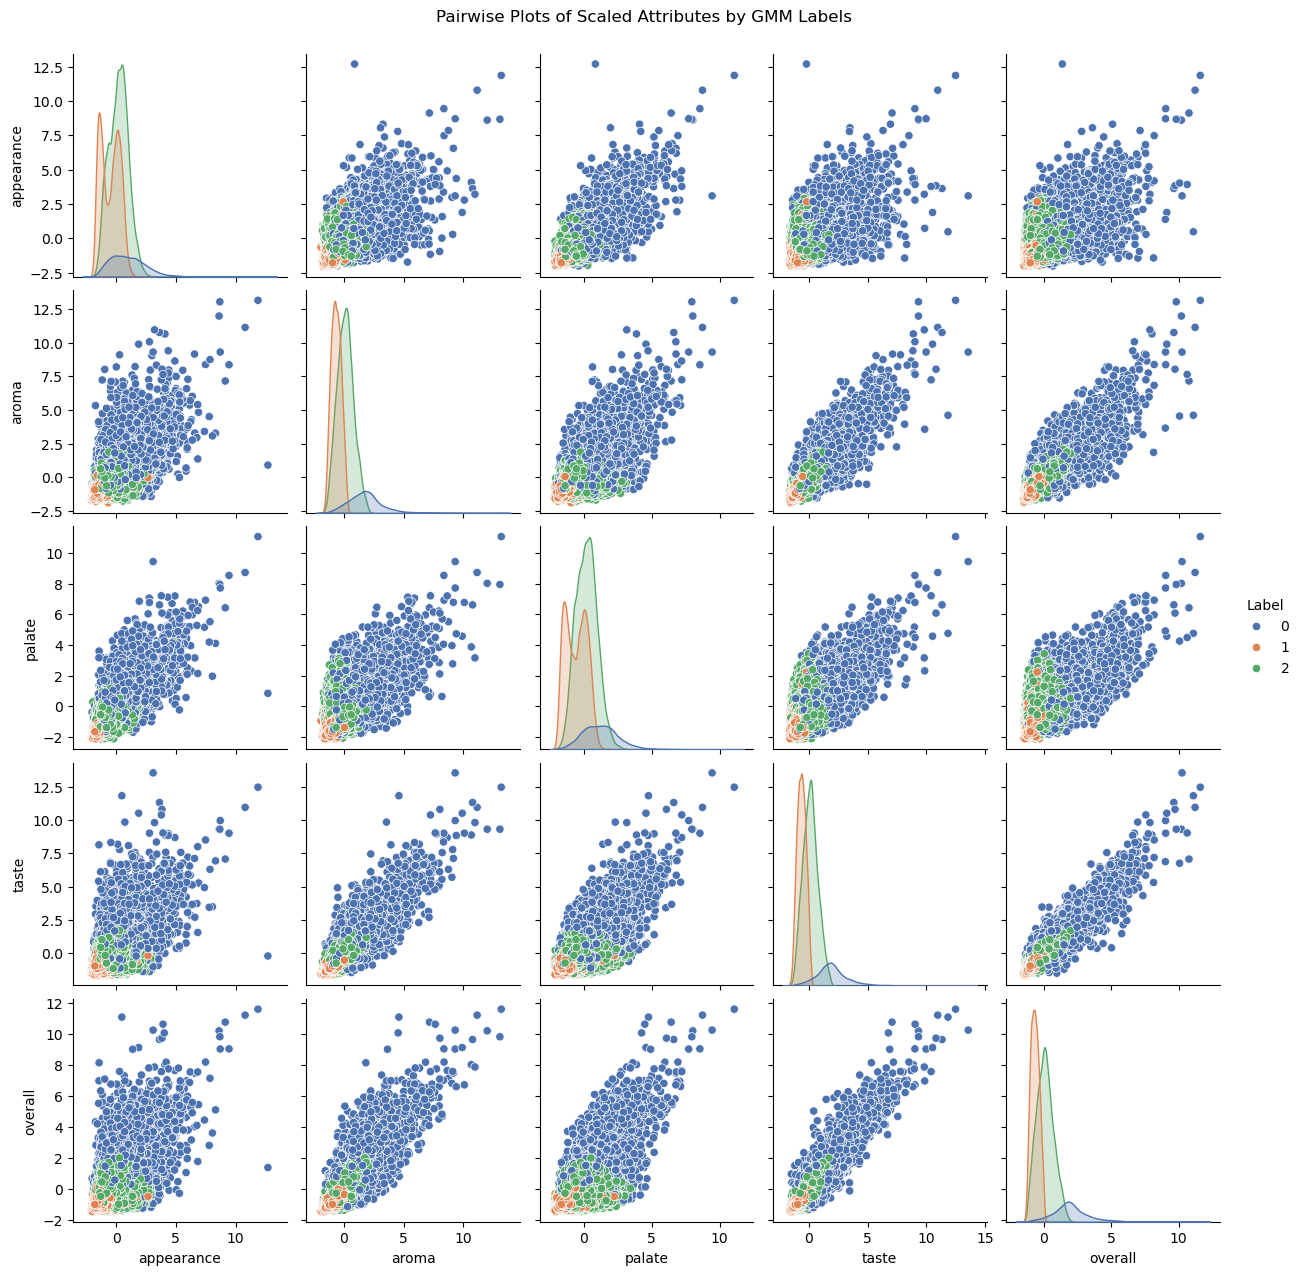

In [7]:
labels = visualize_gmm_all_dimensions(attributes_variance, n_components_gmm=3)

In [ ]:
print_label_statistics(labels)

The clusters were computed using variances that were standardized using Zscore.

As the clusters go from smaller variance to the biggest, they are relevent to our analysis and will be therefore kept as our main way of defining controversiality. It also ensure us that our cluster are "mathematicaly" the best and are therefore not arbitrary.

As discussed earlier, we use variance as a key metric to capture controversiality. It is controversial if it has a high variance across its attributes, and universal if it shows low variances. The values displayed on the plot represent the scaled variances. Since all variances are positive, smaller scaled variances (closer to 0) indicate lower variance, while larger values correspond to higher variance. Based on this definition, we define the clusters as follows:

- Cluster 0 : Controversial beers, accounting for 9.81% of those with sufficient number of ratings.
- Cluster 1 : Universal beers, representing 37.13%.
- Cluster 2 : Neutral beers, representing 53.06%.



# Part 3 Extracting information from the textual reviews

In the previous part we used every aspect that the user could grade except the textual reviews. In this part we aim at choosing a model to perform sentiment analysis, and observe if using this score can further improve our classification of beers.


## Part 3.1: Sentiment Analysis

We will begin by performing a sentiment analysis on the reviews. This will help us gain deeper insights when we later classify the reviews by topics. The primary objective is to identify a reliable, multilingual model. To achieve this, we will compare the performance of various models:  A [BERT base multilingual uncased model](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment), [Google Cloud NLP](https://cloud.google.com/natural-language/docs/analyzing-sentiment?hl=fr), [GPT-4o mini](https://openai.com/index/gpt-4o-mini-advancing-cost-efficient-intelligence/) and a 
[distilbert base multilingual cased model](https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student).

We will compare the performance of each model on the first 6,000 reviews. We chose 6,000 reviews because it is a large enough sample for a minimally biased analysis while helping save on API credits.

Each review was labeled as Positive (1), Neutral (0), or Negative (-1).  We kept the result of this analysis in the [_sentiment_analysis.csv_](https://drive.google.com/file/d/1attiqoXvTSruf6DDXodvU7jFvLKZCOHr/view?usp=sharing) file.

We then compared the models’ performances based on exact similarity and similarity within a range of ±1. The latter is particularly relevant because it allows us to identify models that may produce false positives or false negatives.

In [59]:
[df, exact_similarity_columns, plus_minus_1_similarity_columns] = compute_similarity_scores(sentiment_analysis_df)

We plot the result in the following bar plots for the exact and ±1 similarity scores across different pairs.

In [ ]:
plot_sentiment_similarities(df, exact_similarity_columns, plus_minus_1_similarity_columns)

First, we observe by looking at the bar plots that the BERT and Distlilbert, the Google Cloud NLP and GPT-4o mini models, as well as the BERT anf Google Cloud NLP models show the highest similarity for exact sentiment, exceeding 65%.

Additionally, the Google Cloud NLP and GPT-4o mini models have nearly 100% similarity when considering a margin, followed closely by the BERT-based model and GPT-4o mini, and then by the DistilBERT model and GPT-4o mini.

Given that GPT-4o mini, the BERT model and Google Cloud NLP are very similar in the second graph, that GPT-4o mini is falling behind in the exact sentiment comparison and the DistilBERT model is behind the other models in both comparisons, we should use either Google Cloud NLP or the BERT-based model. Even though Google Cloud NLP has a slightly better similarity in both comparisons, it also an expensive api for large datasets. We will therefore use the BERT-based model for the final sentiment analysis.

## Part 3.2: Comparing the distribution with the other attributes

Now that we have a sentiment score for the comments with a textual review we can compare the distribution with the other grades. We want to see if it adds information, or if it is related with another attribute. For this we first need to recompute the grades provided by the sentiment analysis as the score is between -1 and 1. We can then filter the remaining beers and perform our statistical analysis.

In [ ]:
#Recomputes the grades
ratings_with_sent_df = recompute_grade(ratings_with_sent_df, min_grade_value = 1, max_grade_value = 5, attributes_of_interest = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating','sentiment_bert'])

#Filters the remaining beers, breweries, users and ratings
beer_ratings_new_sent,breweries_df_new_sent, beers_df_new_sent, users_df_new_sent = filter_ratings_new(ratings_with_sent_df, beers_df, breweries_df,users_df, threshold=30, attributes=['appearance', 'aroma', 'palate', 'taste', 'overall','sentiment_bert'])

#Computes the variance of the various attributes of interest
attributes_variance_sent = compute_variance_per_attribute(beer_ratings_new_sent, ['appearance', 'aroma', 'palate', 'taste','overall','sentiment_bert'])

We note that by keeping only comments with a textual description, we keep 7.93% of the initial beers. However we still keep 47.25% of the comments.

As mentioned previously we want to test if the distribution of the variance provided by the sentiment analysis is similar to the distribution of another attribute. Therefore, we perform a T-Test statistic to evaluate this hypothesis. The T-Test is applied on the variance of each attribute. The H0 hypothesis is the following : the true mean of the variance of a given attribute between the different beers are equal. H1 is the following : the means are different.
We decided to plot the results in a Heatmap where the value is the p-value of the statistical test between the variance of two attributes. The diagonal should be 1 as it is twice the same distribution.

In [ ]:
t_test_statistic(attributes_variance_sent, attributes_of_interest = ['appearance', 'aroma', 'palate', 'taste','overall','sentiment_bert'])

From the previous plot we can reject the H0 every time with a significance level of 5%. This means that the sentiment analysis provide additional information to the attributes we already have. 

Now, we want to see how variance of the sentiment score is correlated with the other attributes.

In [ ]:
correlations = compute_correlation(attributes_variance_sent, ['sentiment_bert'])
plot_correlation(correlations, 'Correlation of attributes variances with the variance of the sentiment analysis')

From the above plot we see that the sentiment score variance is positively correlated with all the other attributes. Every correlation is around 0.5, the smallest correlations are for appearence and overall at around 0.47. This could tell us that the textual review does not provide as much information about the variance of the appearance and overall than for other attributes. However such hypothesis would need to be studied more carefully with keywords analysis.

## Part 3.3: Clustering and comparison against the previous cluster

In Part 2, we clustered the beers using GMM on the attributes. Now we can add the information provided by the sentiment analysis and compare the different clusters. We aim at evaluating the clusters and thus choosing how we will define controversiality for the rest of our analysis. Now let us first perform the GMM clustering. For meaningful comparison, we use three clusters as done in Part 2.

In [ ]:
labels_sent = visualize_gmm_all_dimensions(attributes_variance_sent, n_components_gmm=3)

In [ ]:
print_label_statistics(labels_sent)

Similarly to the previous part, we observe what the different clusters look like across the various attributes.
The clusters were computed using variances that were standardized to have a mean of 0 and a standard deviation of 1.

Using again our definition of controversiality, a beer is controversial if it has a high variance across its attributes, and universal if it shows low variances. As before, the values displayed on the plot represent the scaled variances. Since all variances are positive, smaller scaled variances (closer to 0) indicate lower variance, while larger values correspond to higher variance. Furthermore, we can note that the distribution of cluster 0 and 1 overlaps each other. We decided to use the distribution of overall to set the clusters label. Based on this definition, we define the clusters when adding sentiment analysis as follows :
- Cluster 0 : Neutral beers, accounting for 38.52%
- Cluster 1 : Controversial beers, representing 9.83%.
- Cluster 2 : Universal beers, representing 51.64%. 

Now we want to compare the two clustering made with and without sentiment analysis and see if they differ. This will be done only on the beers containing textual reviews.



In [ ]:
compare_two_clustering(attributes_variance, attributes_variance_sent, labels, labels_sent, [1,2,0], [2,0,1])


We see that clusters do not match in 65% of the cases. We believe the cause is coming from the sentiment score. During the evaluation process of the model we saw that we had 66% of similarity if the texts are classified as 0,-1 or 1. Therefore it introduces a higher variance since it is noisy. We also see that number of beers per label differs from the initial clustering.

## Part 3.4: Understanding the difference between the two clusters

We previously found two clustering, one with the sentiment analysis and one without. The clusters labeled 65% of the beers in the same way. However we want to understand what is the reason. To have a faire comparison, we want to create a new clustering using only the ratings having a textual review, but without using it. This is done to mitigate the source of difference. Between the two previous clusters we had two variables which changed:
- The number of ratings
- The sentiment score

By clustering without the sentiment score on the ratings having only a textual review, we can compare the obtained clusters with the preivously found clusters, and thus explain the difference.

In [ ]:
labels_sent_without_sent = visualize_gmm_all_dimensions(attributes_variance_sent[['appearance','aroma','palate','taste','overall']], n_components_gmm=3)

In [ ]:
print_label_statistics(labels_sent_without_sent)

By looking at the plot we can define by using the same methodology as described before the following clusters:
- Cluster 0 : Neutral beers, accounting for 37.26%
- Cluster 1 : Controversial beers, representing 6.20%.
- Cluster 2 : Universal beers, representing 56.54%. 

We first compare the two clusters obtained on the ratings having a textual review.

In [ ]:
compare_two_clustering(attributes_variance_sent, attributes_variance_sent, labels_sent_without_sent, labels_sent, [2,0,1], [2,0,1])


We have a 90% correspondance between the labels. The sentiment score would only change the label of 10% of the beers.
Now let's compare the two clusters generated without the sentiment score.

In [ ]:
compare_two_clustering(attributes_variance, attributes_variance_sent, labels, labels_sent_without_sent, [1,2,0], [2,0,1])


We have only 67% of correspondence. This means that the difference of the number of beers used for the clustering results in a 33% difference.
This is bigger than the difference due to the sentiment score.

Our initial explanation from Part 3.3 is contradicted here. The sentiment score generates a difference of 10% in labeling, which is not an issue. However, the number of beer changes drastically, therefore we prefer to keep the initial clusters. Furthermore since we have only 10% of difference with or without sentiment, it does not provide sufficient supplementary information to balance out the loss of generalization due to the decrease in size of the dataset. Furthermore those 10% could be due to the similarity of "only" 66% of the model. In the end we would need real labels to have a sentiment score which would serve as ground truth and on which we could rely on. For all those reasons, we decided to pursue the analysis of the next parts with the clusters discovered in Part 2.

In conclusion, sentiment analysis provides another attribute which adds information compared to the other attributes. However we need more accurate results or at least results on which we could rely more confidently to use them for the next step of this analysis. Lastly, using only the ratings with textual review would drastically shrink the size of the dataset.



# Part 4 Analysing potential reasons of controversiality

After having labelled the various beers into three categories, we study some underlying factors behind the variance of the grading of some beers. We analyze the effect of the four main attributes, the alcohol by volume, the number of ratings of the beer, the level of expertise of the user and the origin of the user/beer. By level of expertise, we mean that we want to separate them into three categories, which we will delve into later.

## Part 4.1 Effect of the main attributes

First, we will analyze again the distribution of the variances of the main attributes for each class.

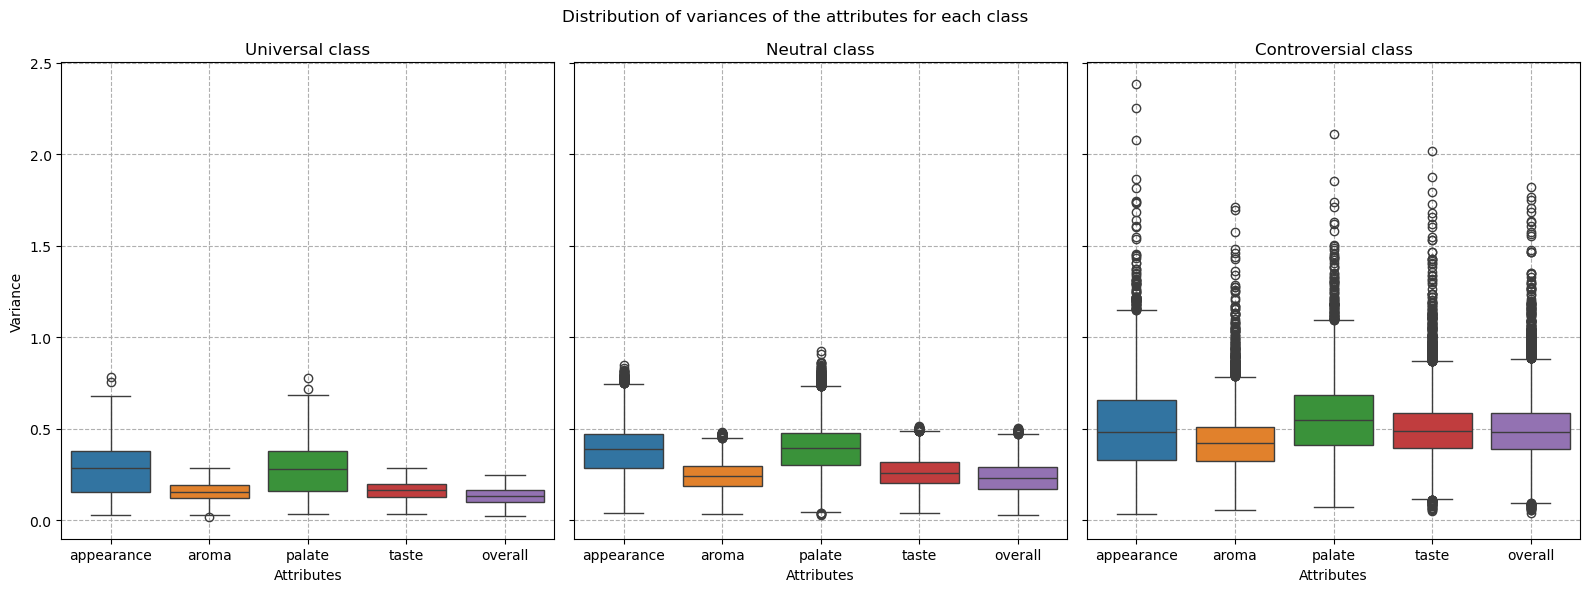

In [14]:
plot_attribute_variance_distrib_per_label(attributes_variance, labels, label_list=[1,2,0])

We observe that **appearance** and **palate** exhibit the highest mean variance across all classes, suggesting they may contribute the most to the controversiality of a beer. However, it is important to note that these attributes are scored on a scale with a lower resolution in the RateBeer dataset. As a result, it amplifies the variance of these attributes.

Additionally, the plot shows that there are no extreme outliers for universal and neutral class. This might indicate that the GMM classification was effective in separating beers with less controversial attributes.

## Part 4.2 Effect of the alcohol by volume

An attribute given for the beers is the alcohol by volume (abv) level of the beers. We want to test the correlation between the abv and the frequency of a beer being labeled as controversial. 

First let us look at the distribution of beers with a certain amount of abv, and the proportion of each each class corresponding to an abv level. 

In [ ]:
range_grouped_abv = plot_distribution_rating_abv(attributes_variance, beers_df_new[['id','abv']], labels, save = False, interactive = False, label_list=[1,2,0])

We notice that most of the beers have an abv between 0 and 15. Furthermore, for beers upper 12% of abv, we notice the proportions oscillate much more. This is due to the very small quantity of beers that are this strong and that have enough ratings.

We observe that at high abv, the beers are more frequently classified as controversial. However the results needs to be taken with a pinch of salt, since we have very few beers at this level, which do not provide reliable results.

We now want to compute the correlation between the abv level and the proportion of the classified beers and the total number of beers. This will be done for beers with an abv smaller than 12, as we believe the oscillation could falsify our results. 

In [ ]:
correlations = compute_correlation(range_grouped_abv[range_grouped_abv.avg_abv<12].drop(columns='abv_range'), ['avg_abv'])
plot_correlation(correlations, title = 'Correlation of the alcohol by volume with the number and proportion of each class')

We observe that the number of beers in total and for each class (except controversial) is positively correlated with the abv. However more suprisingly the abv is positively correlated with the frequency of universal beers, and the total universal beers. This can lead us to believe that up to 12%, if the abv increases, then opinions are more universal (could be all positives or negatives).

## Part 4.3 Effect of the number of ratings

Another attribute we have is the number of ratings for a beer. We want to perform the same analysis as for the abv. First, let us look at the distribution of the number and proportion of beers classified within one of the three categories for a certain amount of number of ratings.


In [ ]:
grouped_df_nbr_rating = plot_distribution_rating_nbr(attributes_variance, beers_df_new[['id','nbr_ratings']], labels, label_list=[1,2,0])

Similar to the the analysis of the abv, we note a point where the amount of beers starts to be too small, creating oscillations. This point is around 5'000 ratings. However in this case this happens at the final possible amount of ratings. At around 2'000 ratings we can already notice small fluctuations, but the trends are similar to the previous lines. 

Now let us take a look at the correlation between the number of ratings and the  number of beers per class and their frequency. 

In [ ]:
correlations1 = compute_correlation(grouped_df_nbr_rating.drop(columns='nbr_ratings_range'), ['nbr_ratings'])
plot_correlation(correlations1, title = 'Correlation of the amount of ratings with the number and proportion of each class')

This time we plot the correlation for every number of ratings above the threshold of 30 ratings set at the beginning. This is unlike the abv where we had a maximal threshold for the abv to avoid high oscillations. The absolute correlation values are smaller than on the abv graph. Furthermore we notice two positive case: the universal and controversial controversy. However this remains very small. Also the total_number has negative correlation which decreases in the three cases. 

## Part 4.4 Effect of the expertise level of the user
Another attribute we believe could influence the controversiality of a beer is the expertise level of the user. By expertise level we mean that if a user made 5 ratings while another made 5'000, they might neither grade the beer in the same way (e.g. being more severe), nor attribute the same importance to different characteristics of the beer. As a result, we believe that some type of users might be more responsible for the controversiality of the beer than other. We will compute the proportion of beer labeled as controverisal/universal/neutral for each type of user and analyse the results.

First we need to find a threshold to classify the users. We want to create three classes: connoisseur, enthusiast and novice. Note that this is not based on the actual numbers of beers an individual has tested but the number of beers he has **rated**.

Also note that the number of ratings of a user counts the one he made after removing the ratings for beer that have too few ratings.

In [ ]:
plot_histogram_nbr_ratings_total(users_df_new)

By inspecting the above graph, we can set two thresholds. One at around 20 ratings and the second around 800 ratings. The first threshold corresponds to the points where the first line changes slope. After this point the frequency starts to oscillate. The second points corresponds to the point where the oscillations increases drastically. Furthermore with the printed stats we can see that 50% of the users made 3 or less ratings. In the end our first threshold is after the 75% quantile.


If we sum up the classes we have:
- Novice: <=20 ratings, it contains 80.9% of the users
- Enthusiast: >20 ratings and <=800 ratings, it contains 17.4% of the users
- Connoisseur: >800 ratings it contains 1.6% of the users

We can now compare the proportion of the beers having different labels between the different level of users.

In [ ]:
users_df_new = classify_user_rating_level(users_df_new, enthusiasts_level=20, connoisseur_level=800)
plot_user_expertise_distrib(users_df_new)

In [ ]:
compute_rating_by_user_time(ratings_df = ratings_df, users_df = users_df_new, beers_df = beers_df_new, label = labels, label_list = [1,2,0], user_level = [20,800])

We plot the mean proportion of the different users in the above plot. We also add a confidence interval of 95% that was computed with the standard error. It is important to note that all users are considered at first as novice. Experts have their first 20 comments classified as novices, then they are considered as enthusiast, and after 800 it will be considered connoisseur ratings. The plot shows the mean proportion of the users rated beer, when he belonged to a certain class of users. 

From this plot we can highlights the following results:
-⁠⁠ The controversiality and neutral mean proportions decrease with the level of the user
-⁠ ⁠The universality in opposition increases with it
-⁠ ⁠The confidence interval is larger for connoisseur
The latter might be due to lower number of connoisseur ratings.
From this table we can observe that connoisseur are drinking more universal beers than other users. Conoisseur might have more representative tastes.

One could also analyse the correlation with the amount of ratings made by the user and the proportion of the ratings. However we decided to do a different analysis for this segment than the previous ones.

# Part 5 Countries influence on the controversiality

Lastly for our project, we wanted to analyze the influence of the origin of the user/beer. The idea initially came from an other project proposal, but we felt it could be integrated into this project. Our main motivation, is that we know that certain countries have rivalities with others, or certain countries forbid alcohol. Therefore they may grade differently the beers. 

## Part 5.1 Importance of the origin of the user

In this part we want to look at the influence of the origin of the user. For this we plan to understand if a certain countries of origin provide comments to more controversial or universal beers. First we want to have a glimpse on the data and understand where does the users come from. 

In [ ]:
plot_distribution_number_ratings_per_country_of_origin_of_user(users_df_new, beer_ratings, N = 80)

We see from the plot that some countries (e.g the US) provide much more comments, Compared to certain countries by up to 4 order of magnitude. If you change the parameter N of the function, you can look at other countries. We also note that $10^5$ ratings come from users with an unknown location.

In [ ]:
users_df_corrected = plot_frequency_user_from_country_label(beers_df_new,users_df_new, beer_ratings, labels, label_to_match = 0, possible_labels = ['controversial','universal', 'neutral'])
users_df_corrected = plot_frequency_user_from_country_label(beers_df_new,users_df_new, beer_ratings, labels, label_to_match = 2, possible_labels = ['controversial','universal', 'neutral'])
users_df_corrected = plot_frequency_user_from_country_label(beers_df_new,users_df_new, beer_ratings, labels, label_to_match = 1, possible_labels = ['controversial','universal', 'neutral'])

We note from the previous plots that users from small countries tend to drink and rate more controversial beer, Mongolia being the country with the highest proportion. The universal frequency is similar in a lot of country, particularly Europe and America seem to have a higher proportion for universal ratings.

## Part 5.2 Importance of the origin of the beer

Now that we analyzed the country of origin of the user, we can also compute the frequency of a labelled beer for the location of the beer.

In [ ]:
plot_distribution_number_ratings_per_country_of_origin_of_beer(beers_df_new, breweries_df_new, beer_ratings, N = 80)

In [ ]:
compute_proportion_label_per_country(breweries_df_new,beers_df_new, attributes_variance, labels, 0, possible_labels = ['controversial','universal', 'neutral'])
compute_proportion_label_per_country(breweries_df_new,beers_df_new, attributes_variance, labels, 2, possible_labels = ['controversial','universal', 'neutral'])
compute_proportion_label_per_country(breweries_df_new,beers_df_new, attributes_variance, labels, 1, possible_labels = ['controversial','universal', 'neutral'])

As a reminder, we found in Part 2.3 the following result: 37%, 53% and 10% of the beers are respectively universal, neutral and controversial. We expect countries to have a similar distribution of label, especially countries with many beers such as the USA.

We can see that our hypothesis is true for the European countries. The US however seem to have a higher percentage of universal beers. Furthermore the smaller countries, south american, asian and some african countries tend to have a higher proportion of controversial beers. However since some countries have fewer beers, they can have a higher proportion of controversial beers and not follow our initial hypothesis.

## Part 5.3 Relation between origin of the user and origin of the beer

Having analysed the frequency of the user's and the beer's country of origin, we now turn our focus to the relationship between the two. Specifically, we aim to determine whether certain countries are more likely to consider beers from their own country or from other countries as controversial. For this we propose a metric to analyse this for a particular class.

Let $s_x^{class}$ be the frequency of a certain class for beers of the country similar as the country of origin of the user, and let $s_y^{class}$ be the frequency for a certain class for beers of the country different to the country of origin of the user, we obtain that the score is defined as:

$$Score^{class} = s_x^{class} - s_y^{class}$$

Now let is use an example. Imagine we compute the frequency of controversiality. If the country tends to classify with a higher frequency as controversiality for beers from the same country than beers from a different country we get that the score tends to +1. If the score goes to -1 it means that the country has a higher frequency of beers labelled as controversial from foreign countries than other countries.

In [ ]:
plots_statistics_origin_beer_wrt_user_origin_sum(beers_df_new, breweries_df_new, users_df_new, beer_ratings, labels, label_to_match = 0, possible_labels = ['controversiality','universalality', 'neutrality'])
plots_statistics_origin_beer_wrt_user_origin_sum(beers_df_new, breweries_df_new, users_df_new, beer_ratings, labels, label_to_match = 1, possible_labels = ['controversiality','universalality', 'neutrality'])
plots_statistics_origin_beer_wrt_user_origin_sum(beers_df_new, breweries_df_new, users_df_new, beer_ratings, labels, label_to_match = 2, possible_labels = ['controversiality','universalality', 'neutrality'])

We can observe that:
- South America and Asia notably tend to grade beers more universally from foreign countries.
- South America tends to rates their own beer controversially. 
- The United States of America and Kazakhstan are in an opposition trends to the other countries: beers from their country are more universal, and they rate beers as controversial more for beers of foreign countries.
- Some Asian and African countries tends to not judge local or foreign beers differently.
- Finally by looking at the statistics of the score we see that the mean is positive for controversiality and neutrality (17% and 2%). Most countries tends to rate more controversially and neutrally beers of their countries. Furthermore the mean score for universality(19%) is negative, which could lead us to believe that country grade more universally beers from foreign countries.

Note that the mean is not weighted with the amount of beers of a country, each country has the same influence on the mean score.

The US produces the most beers, and has the most users, they also tends to grade their own beer as universally. Due to the importance of the US in the dataset we must keep in mind their influence and how it might bias the results. Other users would also drink those universal beers but they would be considered as foreign countries for them.



## Part 6 Future work

Future work could include the following :
- In part 2.1 and ???, when filtering beers to ensure a robust and meaningful variance for further analysis, futher work could include lowering the threshold and weight the beers according to their number of ratings (COMMENTARY TO DEVELOP)
- KEYWORD ANALYSIS
- Very sensitv eth threshold used (25 or 10) (((???)))

# Part 7 Conclusion

As a conclusion, through this notebook we have seen that it is difficult to classify the beers into universal and controversial classes. Therefore we switched to GMM. We ended up with a ratio of 37/53/10 for universal, neutral and controversial beers respectively. Furthermore the sentiment analysis provides further information about the beers. If we cluster on it, the labels remain at 89% similar as if we do not cluster with the sentiment analysis. We could use the sentiment analysis, however due to the 65% +1/-1 accuracy we decided that it may influence the result in a way we do not want to.

Following this we can analyse the relation with the alcohol by volume, number of rating and the user level. We need to be careful of edge cases. The universal frequency is positively correlated with the alcohol by volume and the number of ratings. The later one is also positively correlated with the controversial frequency. The abv has a higher absolute correlation value with the frequencies, it may be more of an underlying factor than the number of ratings for the classification. Finally we noticed that novice rater, representing a huge part of the user base are more prone to rate non universal beers than the other graders.

Finally the nationality plays a certain role, for the origin of the beer but also the origin of the user. We have seen that the United States, which produces the most beers (of the dataset) and has the biggest amount of users, has a different trend than most countries when grading a beer. 

This work contains a lot of nuancing and doors that where not followed due to a lack of time and ressources. Therefore a lot of work could be done to pursue this study.

Thank you for reading through this notebook, enjoy your Holidays. 

